In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
# create folder for result
if not os.path.exists("../result/time-series/"):
    os.makedirs("../result/time-series/")

In [3]:
# get range of COVID-19 data

covidDP = "../clean_data/covid-19/time_series_covid19_confirmed_global.csv"
covidDF = pd.read_csv(covidDP)
covidDF["Date"] = pd.to_datetime(covidDF["Date"], format = "%Y-%m-%d")
date = covidDF["Date"].tolist()

In [4]:
#define all FP and corresponding excluded directories
dataFP = "../clean_data/market/"
energies_dir = "Commodities/Energies"
grains_dir = "Commodities/Grains"
meats_dir = "Commodities/Meats"
metals_dir = "Commodities/Metals"
crypto_dir = "Cryptocurrencies"
currencies_dir = "Currencies"
funds_dir = "Funds_ETFs"
index_dir = "Index"

energies_excluded_dir = ["CrudeOil_CL.csv"]
index_excluded_dir = ["NASDAQ_100_Tech.csv", "NASDAQ_100_Index.csv",
                              "NASDAQ_100_ExTech.csv", "CBOE_VolatilityIndex.csv"]
crypto_excluded_dir = ["Tezos.csv", "EthereumClassic.csv", "NEM.csv", "Ethereum.csv", "Tether.csv"]

In [5]:
def PlotImage(root_dir, date, excluded_dir = None):
    markerStyle = ['.', ',', 'o', 'v', '^', '1', 'p', 'P', '*', '+',
                  'x', 'X', 'd', 'D', '-', '_', 'h', 'H', '<', '>']
    
    fontsize = {'size': 16}
    
    plt.figure(figsize=(15, 10))
    plt.title(root_dir, fontsize)
        
    plotNumber = 0
    for root, dirs, files in os.walk(dataFP + root_dir):
        for file in files:
            path = dataFP + root_dir + '/' + file
            if not path.endswith('.csv') or (excluded_dir is not None and file in excluded_dir):
                continue
                
            indicatorData = pd.read_csv(path)
            indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
            indicatorData.sort_values('Date', inplace=True, ascending=True)

            # Only keep data within the range of the covid data
            indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
            indicatorData = indicatorData[["Date", "Close/Last"]]

            indicatorDate = indicatorData["Date"].tolist()
            indicatorDate = [str(each) for each in indicatorDate]
            indicatorDate = [each[:10] for each in indicatorDate]
            
            indicatorValue = indicatorData["Close/Last"].values
            base = indicatorValue[0]
            new_indicatorValue = []
            for each in indicatorValue:
                if each / base < 1:
                    new_indicatorValue.append(-100.0 * (1 - each / base))
                else:
                    new_indicatorValue.append(100.0 * (each / base - 1))
            
            plt.plot(indicatorDate, new_indicatorValue, label=file[:-4], linewidth = 1, linestyle = "--", marker = markerStyle[plotNumber % 10], markersize = 5)
            plt.xticks(indicatorDate[::10], fontsize = 16, rotation = -30)
            plt.yticks([-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], ['-90%','-80%','-70%','-60%','-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%','60%','70%','80%','90%'], fontsize = 16)
            plt.legend(prop = fontsize)
            plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
            plt.xlabel('Date', fontsize)
            plt.ylabel('Rise/Fall Percentage', fontsize)
            
            plotNumber = plotNumber + 1

        root_dir = root_dir.replace("/", "_")
        picName = "../result/time-series/" + root_dir + ".png"
        plt.savefig(picName)

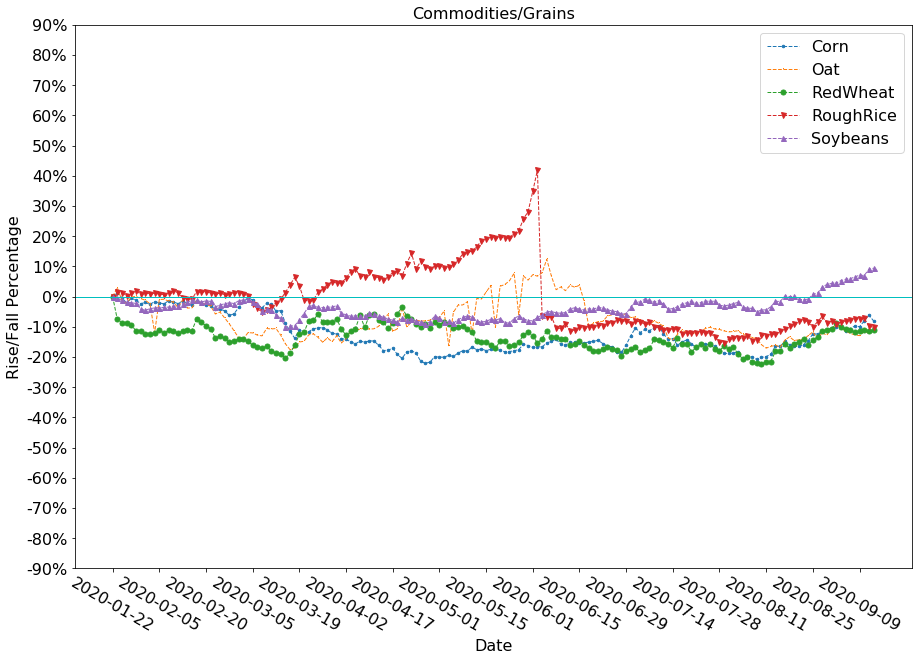

In [6]:
PlotImage(grains_dir, date)

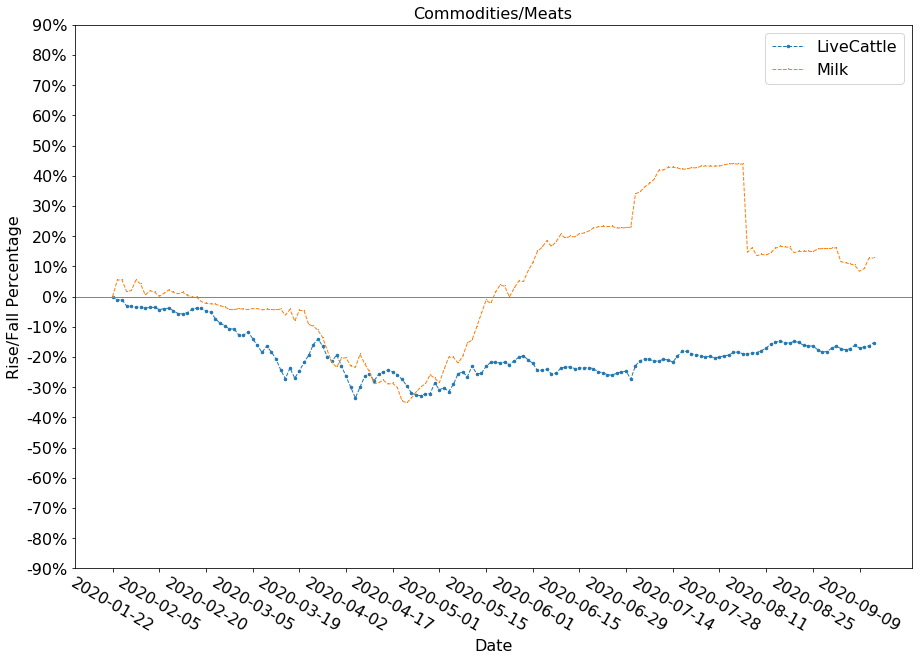

In [7]:
PlotImage(meats_dir, date)

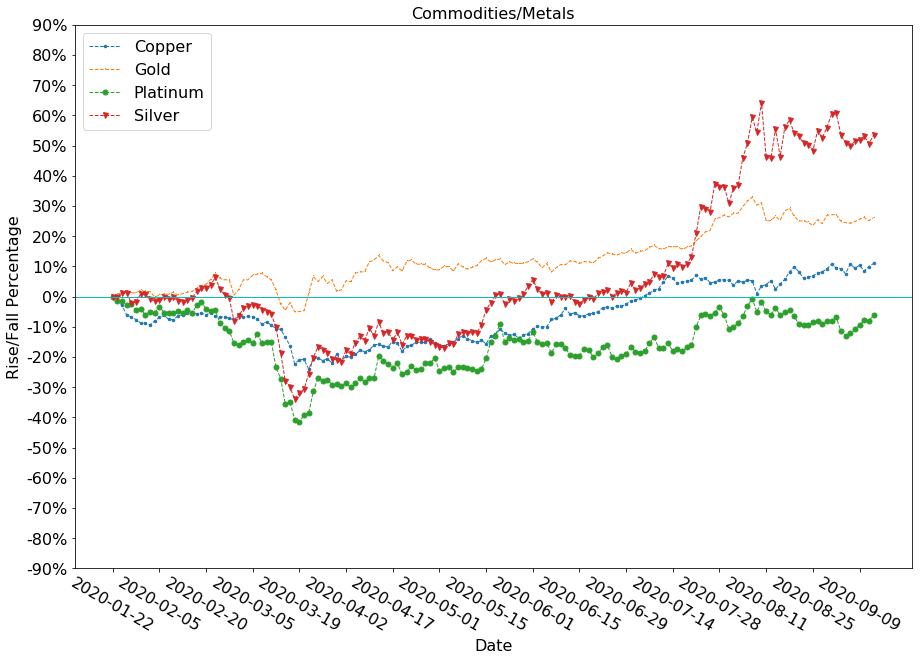

In [8]:
PlotImage(metals_dir, date)

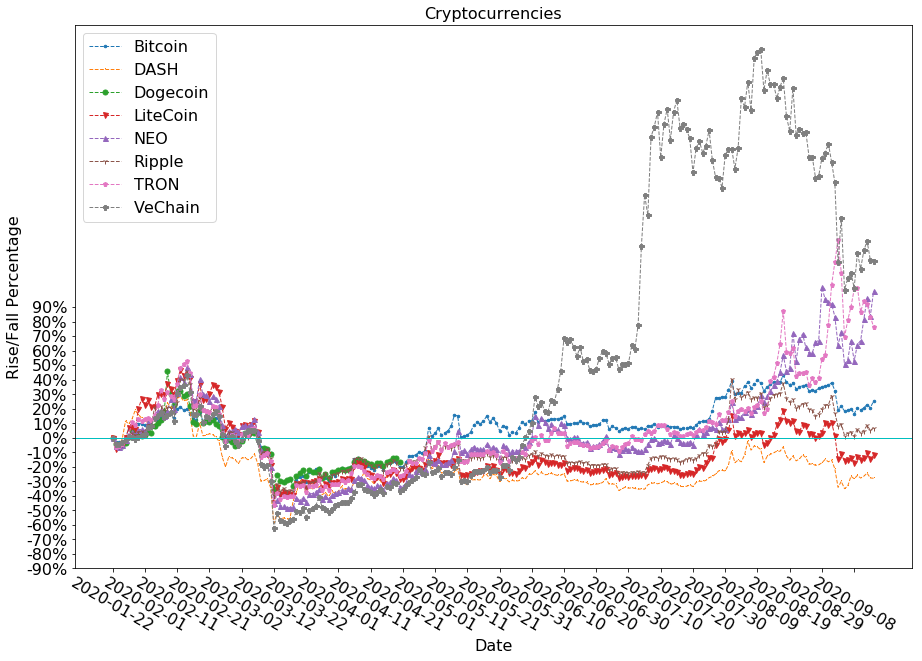

In [9]:
PlotImage(crypto_dir, date, crypto_excluded_dir)

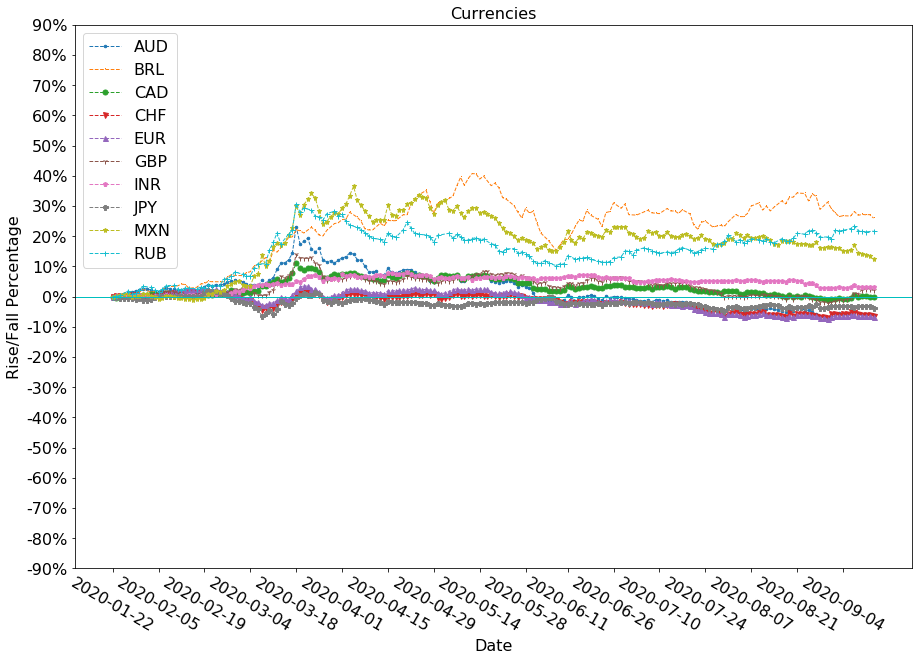

In [10]:
PlotImage(currencies_dir, date)

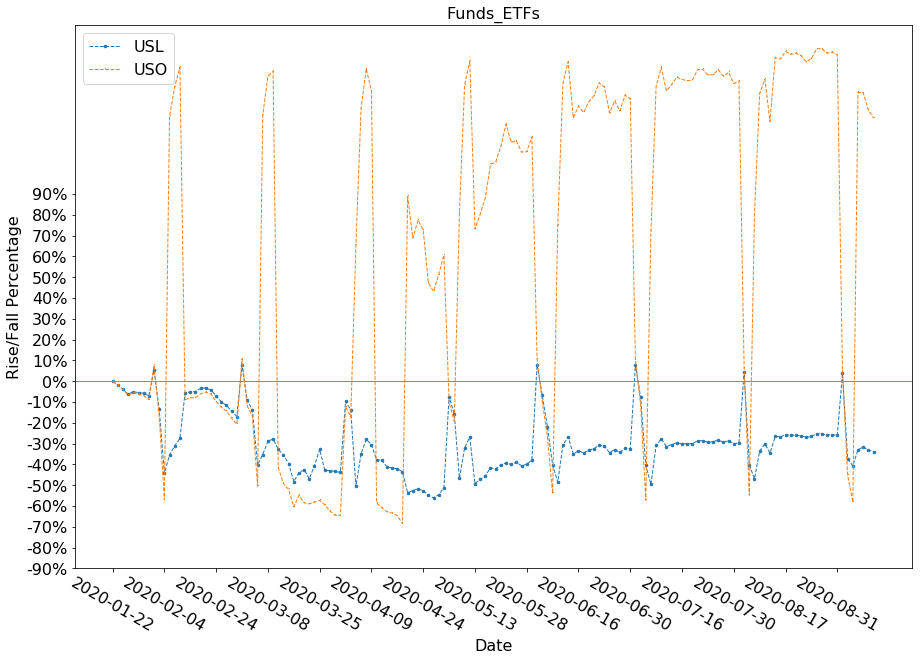

In [11]:
PlotImage(funds_dir, date)

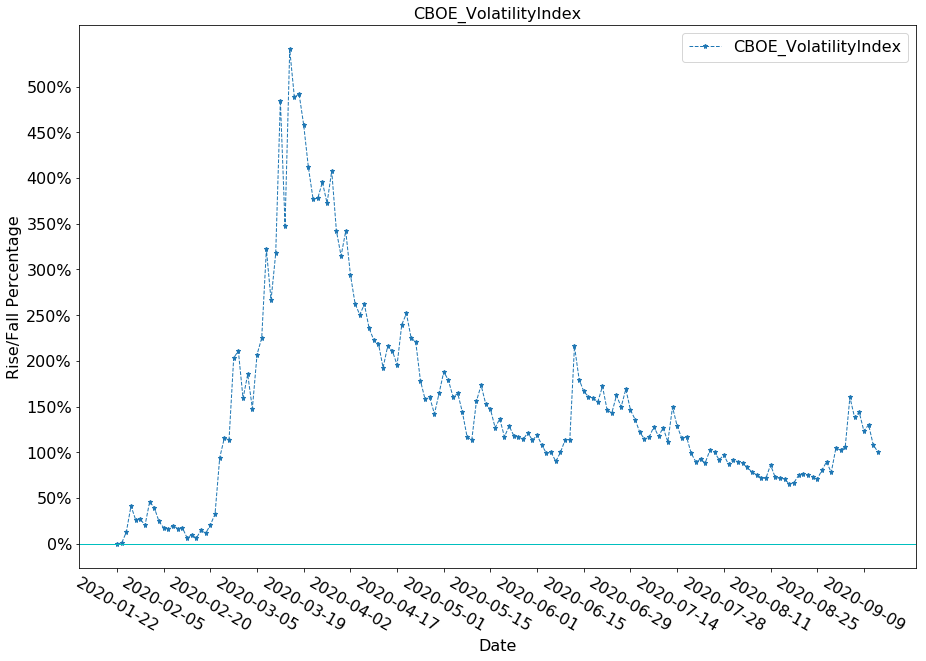

In [12]:
# CBOE
    
file = "../clean_data/market/Index/CBOE_VolatilityIndex.csv"
label = 'CBOE_VolatilityIndex'

fontsize = {'size': 16}

plt.figure(figsize=(15, 10))
plt.title(label, fontsize)

indicatorData = pd.read_csv(file)
indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
indicatorData.sort_values('Date', inplace=True, ascending=True)

# Only keep data within the range of the covid data
indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
indicatorData = indicatorData[["Date", "Close/Last"]]

indicatorDate = indicatorData["Date"].tolist()
indicatorDate = [str(each) for each in indicatorDate]
indicatorDate = [each[:10] for each in indicatorDate]

indicatorValue = indicatorData["Close/Last"].values
base = indicatorValue[0]
new_indicatorValue = []
for each in indicatorValue:
    if each / base < 1:
        new_indicatorValue.append(-100.0 * (1 - each / base))
    else:
        new_indicatorValue.append(100.0 * (each / base - 1))

plt.plot(indicatorDate, new_indicatorValue, label=label, linewidth = 1, linestyle = "--", marker = '*', markersize = 5)
plt.xticks(indicatorDate[::10], fontsize = 16, rotation = -30)
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], ['0%', '50%', '100%', '150%', '200%', '250%', '300%', '350%', '400%', '450%', '500%'], fontsize = 16)
plt.legend(prop = fontsize)
plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
plt.xlabel('Date', fontsize)
plt.ylabel('Rise/Fall Percentage', fontsize)

file = file.replace("/", "_")
picName = "../result/time-series/" + label + ".png"
plt.savefig(picName)

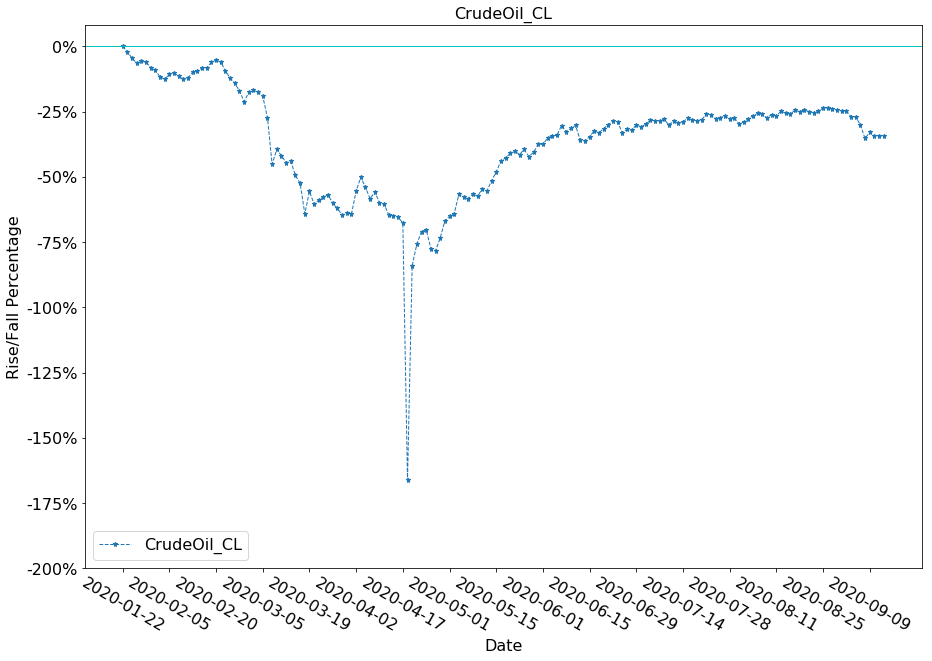

In [13]:
# crude oil
# to plot for Ethanol, Natural Gas and Gasoline, just changed the path of 'Crudeoil.csv' to other energies csv file and plot the graph.
file = "../clean_data/market/Commodities/Energies/CrudeOil_CL.csv"
label = 'CrudeOil_CL'

fontsize = {'size': 16}

plt.figure(figsize=(15, 10))
plt.title('CrudeOil_CL', fontsize)


indicatorData = pd.read_csv(file)
indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
indicatorData.sort_values('Date', inplace=True, ascending=True)

# Only keep data within the range of the covid data
indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
indicatorData = indicatorData[["Date", "Close/Last"]]

indicatorDate = indicatorData["Date"].tolist()
indicatorDate = [str(each) for each in indicatorDate]
indicatorDate = [each[:10] for each in indicatorDate]

indicatorValue = indicatorData["Close/Last"].values
base = indicatorValue[0]
new_indicatorValue = []
for each in indicatorValue:
    if each / base < 1:
        new_indicatorValue.append(-100.0 * (1 - each / base))
    else:
        new_indicatorValue.append(100.0 * (each / base - 1))

plt.plot(indicatorDate, new_indicatorValue, label=label, linewidth = 1, linestyle = "--", marker = '*', markersize = 5)
plt.xticks(indicatorDate[::10], rotation = -30, fontsize = 16)
plt.yticks([-200, -175, -150, -125, -100, -75, -50, -25, 0], ['-200%', '-175%', '-150%', '-125%', '-100%', '-75%', '-50%', '-25%', '0%'], fontsize = 16)
plt.legend(prop = fontsize)
plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
plt.xlabel('Date', fontsize)
plt.ylabel('Rise/Fall Percentage', fontsize)

file = file.replace("/", "_")
picName = "../result/time-series/CrudeOil_CL.png"
plt.savefig(picName)

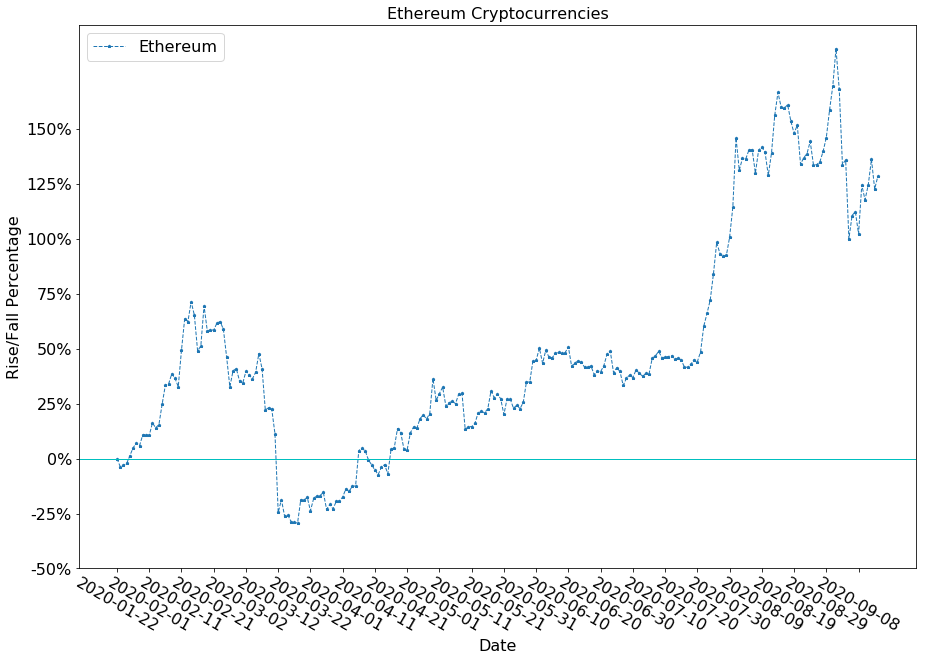

In [14]:
# Crypto

file = "../clean_data/market/Cryptocurrencies/Ethereum.csv"
label = 'Ethereum'

fontsize = {'size': 16}

plt.figure(figsize=(15, 10))
plt.title('Ethereum Cryptocurrencies', fontsize)

indicatorData = pd.read_csv(file)
indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
indicatorData.sort_values('Date', inplace=True, ascending=True)

# Only keep data within the range of the covid data
indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
indicatorData = indicatorData[["Date", "Close/Last"]]

indicatorDate = indicatorData["Date"].tolist()
indicatorDate = [str(each) for each in indicatorDate]
indicatorDate = [each[:10] for each in indicatorDate]

indicatorValue = indicatorData["Close/Last"].values
base = indicatorValue[0]
new_indicatorValue = []
for each in indicatorValue:
    if each / base < 1:
        new_indicatorValue.append(-100.0 * (1 - each / base))
    else:
        new_indicatorValue.append(100.0 * (each / base - 1))

plt.plot(indicatorDate, new_indicatorValue, label=label, linewidth = 1, linestyle = "--", marker = '*', markersize = 3)
plt.xticks(indicatorDate[::10], rotation = -30, fontsize = 16)
plt.yticks([-50, -25, 0, 25, 50, 75, 100, 125, 150], ['-50%', '-25%', '0%', '25%', '50%', '75%', '100%', '125%', '150%'], fontsize = 16)
plt.legend(prop = fontsize)
plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
plt.xlabel('Date', fontsize)
plt.ylabel('Rise/Fall Percentage', fontsize)

file = file.replace("/", "_")
picName = "../result/time-series/Ethereum Cryptocurrencies.png"
plt.savefig(picName)